In [1]:
!pip install --upgrade wandb

     |████████████████████████████████| 1.3MB 14.8MB/s eta 0:00:01
     |████████████████████████████████| 450kB 38.2MB/s eta 0:00:01
     |████████████████████████████████| 102kB 40.8MB/s ta 0:00:01
     |████████████████████████████████| 92kB 32.7MB/s eta 0:00:01
     |████████████████████████████████| 460kB 43.1MB/s eta 0:00:01
     |████████████████████████████████| 92kB 40.8MB/s eta 0:00:01
     |████████████████████████████████| 81kB 36.9MB/s eta 0:00:01
     |████████████████████████████████| 61kB 34.4MB/s eta 0:00:01
     |████████████████████████████████| 256kB 56.7MB/s eta 0:00:01
     |████████████████████████████████| 133kB 53.1MB/s eta 0:00:01
     |████████████████████████████████| 163kB 51.4MB/s eta 0:00:01
     |████████████████████████████████| 71kB 32.5MB/s eta 0:00:01
     |████████████████████████████████| 61kB 29.4MB/s eta 0:00:01
     |████████████████████████████████| 143kB 54.6MB/s eta 0:00:01
     |████████████████████████████████| 184kB 58.1MB/s eta 0:00:01
  

In [49]:
!wandb login d86eadd78a23205e437360af084c318aafb64dc8

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [50]:
import wandb

In [51]:
wandb.init(project="mainproject_v2")

W&B Run: https://app.wandb.ai/rmenon1998/mainproject_v2/runs/5bd527ld

In [11]:
!ls

datasets  mainproject.ipynb  storage  wandb


In [18]:
!cp -r "/storage" "dataset"

In [106]:
!unzip 'dataset/dataset-original.zip' 

Archive:  dataset/dataset-original.zip
   creating: Garbage classification/
   creating: Garbage classification/cardboard/
  inflating: Garbage classification/cardboard/cardboard1.jpg  
  inflating: Garbage classification/cardboard/cardboard10.jpg  
  inflating: Garbage classification/cardboard/cardboard100.jpg  
  inflating: Garbage classification/cardboard/cardboard101.jpg  
  inflating: Garbage classification/cardboard/cardboard102.jpg  
  inflating: Garbage classification/cardboard/cardboard103.jpg  
  inflating: Garbage classification/cardboard/cardboard104.jpg  
  inflating: Garbage classification/cardboard/cardboard105.jpg  
  inflating: Garbage classification/cardboard/cardboard106.jpg  
  inflating: Garbage classification/cardboard/cardboard107.jpg  
  inflating: Garbage classification/cardboard/cardboard108.jpg  
  inflating: Garbage classification/cardboard/cardboard109.jpg  
  inflating: Garbage classification/cardboard/cardboard11.jpg  
  inflating: Garbage classification/

In [25]:
! pip install fastai

     |████████████████████████████████| 3.5MB 10.4MB/s eta 0:00:01
     |████████████████████████████████| 112kB 58.8MB/s eta 0:00:01
     |████████████████████████████████| 102kB 39.0MB/s ta 0:00:01
     |████████████████████████████████| 163kB 46.3MB/s eta 0:00:01
     |████████████████████████████████| 10.3MB 42.8MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 57.2MB/s eta 0:00:01
     |████████████████████████████████| 122kB 52.0MB/s eta 0:00:01
     |████████████████████████████████| 194kB 51.7MB/s eta 0:00:01
     |████████████████████████████████| 3.7MB 49.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 27.9MB/s eta 0:00:01
     |████████████████████████████████| 61kB 17.6MB/s eta 0:00:01
  Created wheel for fastai: filename=fastai-1.0.59-cp36-none-any.whl size=235954 sha256=539c0d3fbb7da2ee2ec2ca8f4c95d67da81cdd7d62bb2046fb601162e2a31d18
  Stored in directory: /root/.cache/pip/wheels/45/3e/33/2286dfb90e4d3e197356552c0743678bb158d47f6e05540029
  Cre

In [52]:
from fastai.vision import *
from fastai.metrics import error_rate
from wandb.fastai import WandbCallback

In [114]:
path = Path('data')
path.resolve()

PosixPath('/notebooks/data')

In [117]:
tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=16)

In [118]:
data

ImageDataBunch;

Train: LabelList (1262 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
paper,paper,paper,paper,paper
Path: data;

Valid: LabelList (630 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
paper,paper,paper,paper,paper
Path: data;

Test: LabelList (635 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: data

In [119]:
print(data.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


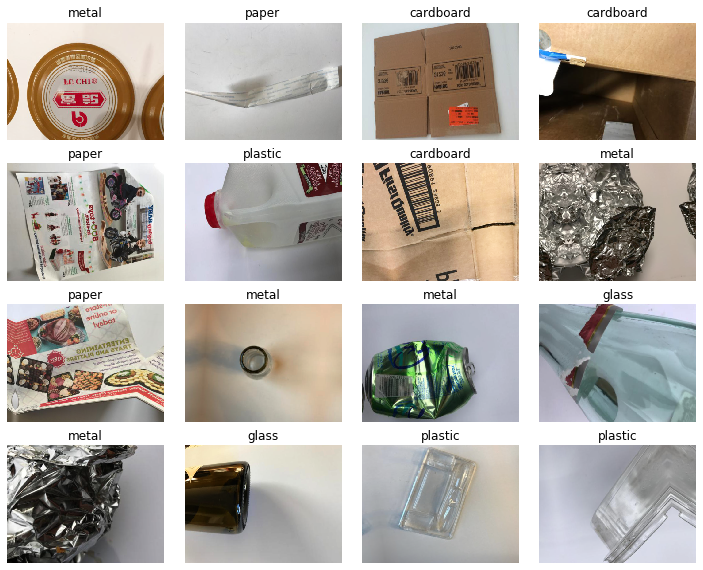

In [120]:
data.show_batch(rows=4,figsize=(10,8))

In [122]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))
print(len(data.test_ds))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
1262
630
635


In [124]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate,callback_fns=WandbCallback)

In [126]:
learn.fit_one_cycle(75,max_lr=5.13e-03)

epoch,train_loss,valid_loss,error_rate,time
0,0.302198,0.223606,0.069841,00:32
1,0.254049,0.206573,0.068254,00:32
2,0.197454,0.198412,0.063492,00:32
3,0.215925,0.234316,0.085714,00:32
4,0.255038,0.233209,0.080952,00:32
5,0.287115,0.237003,0.076190,00:32
6,0.288120,0.260736,0.076190,00:32
7,0.314514,0.303783,0.095238,00:32
8,0.330269,0.425875,0.122222,00:32
9,0.400359,0.410370,0.123810,00:32


Better model found at epoch 0 with valid_loss value: 0.22360621392726898.
Better model found at epoch 1 with valid_loss value: 0.20657263696193695.
Better model found at epoch 2 with valid_loss value: 0.19841192662715912.
Better model found at epoch 52 with valid_loss value: 0.1787348985671997.
Better model found at epoch 57 with valid_loss value: 0.174345925450325.
Better model found at epoch 59 with valid_loss value: 0.1646403670310974.
Better model found at epoch 62 with valid_loss value: 0.153225377202034.
Better model found at epoch 63 with valid_loss value: 0.1500619798898697.
Better model found at epoch 64 with valid_loss value: 0.1497190147638321.
Better model found at epoch 66 with valid_loss value: 0.14664936065673828.
Loaded best saved model from /notebooks/wandb/run-20191107_124444-5bd527ld/bestmodel.pth


In [38]:
learn.recorder.plot_losses()

In [127]:
learn.save('/storage/stage-1final')
learn.export('/storage/exportmainproject_v3.pkl')

In [132]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

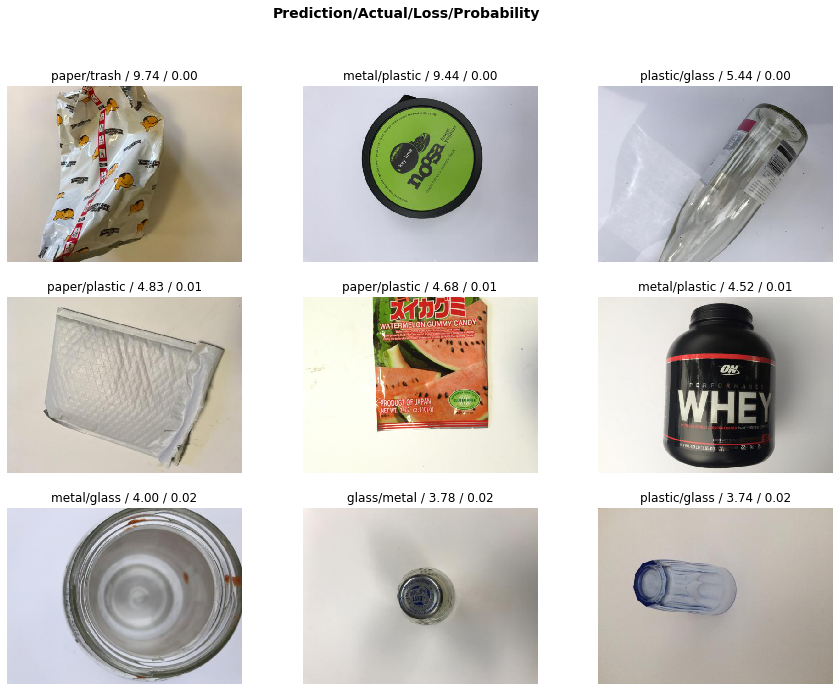

In [133]:
interp.plot_top_losses(9, figsize=(15,11))

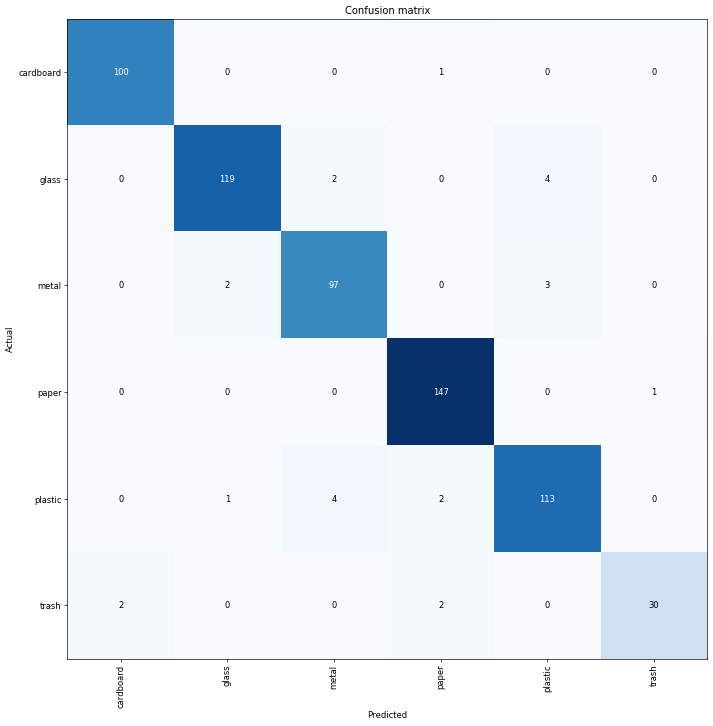

In [135]:


doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)



In [136]:
interp.most_confused(min_val=2)

[('glass', 'plastic', 4),
 ('plastic', 'metal', 4),
 ('metal', 'plastic', 3),
 ('glass', 'metal', 2),
 ('metal', 'glass', 2),
 ('plastic', 'paper', 2),
 ('trash', 'cardboard', 2),
 ('trash', 'paper', 2)]

In [137]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [139]:
print(preds[0].shape)
preds[0]
len(preds)

torch.Size([635, 6])


2

In [140]:
data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [141]:
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

In [142]:
yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])

In [143]:
yhat

['cardboard',
 'glass',
 'cardboard',
 'plastic',
 'glass',
 'paper',
 'glass',
 'plastic',
 'paper',
 'paper',
 'cardboard',
 'cardboard',
 'paper',
 'trash',
 'metal',
 'metal',
 'plastic',
 'metal',
 'paper',
 'paper',
 'paper',
 'glass',
 'cardboard',
 'plastic',
 'paper',
 'metal',
 'paper',
 'paper',
 'metal',
 'paper',
 'trash',
 'cardboard',
 'plastic',
 'plastic',
 'plastic',
 'metal',
 'paper',
 'paper',
 'plastic',
 'plastic',
 'metal',
 'trash',
 'glass',
 'plastic',
 'glass',
 'paper',
 'paper',
 'glass',
 'metal',
 'metal',
 'glass',
 'paper',
 'cardboard',
 'paper',
 'plastic',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'cardboard',
 'plastic',
 'metal',
 'plastic',
 'paper',
 'paper',
 'glass',
 'glass',
 'paper',
 'metal',
 'paper',
 'paper',
 'metal',
 'cardboard',
 'cardboard',
 'trash',
 'paper',
 'plastic',
 'plastic',
 'metal',
 'trash',
 'paper',
 'trash',
 'cardboard',
 'cardboard',
 'trash',
 'metal',
 'paper',
 'metal',
 'paper',
 'cardboard',
 'glass'

In [144]:
data

ImageDataBunch;

Train: LabelList (1262 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
paper,paper,paper,paper,paper
Path: data;

Valid: LabelList (630 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
paper,paper,paper,paper,paper
Path: data;

Test: LabelList (635 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: data

In [145]:


y = []

## convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
    
## then extract waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)



In [146]:
## predicted values
print(yhat[0:5])
## actual values
print(y[0:5])

['cardboard', 'glass', 'cardboard', 'plastic', 'glass']
['cardboard', 'glass', 'cardboard', 'plastic', 'glass']


In [151]:
!pip install seaborn

     |████████████████████████████████| 215kB 13.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [152]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns

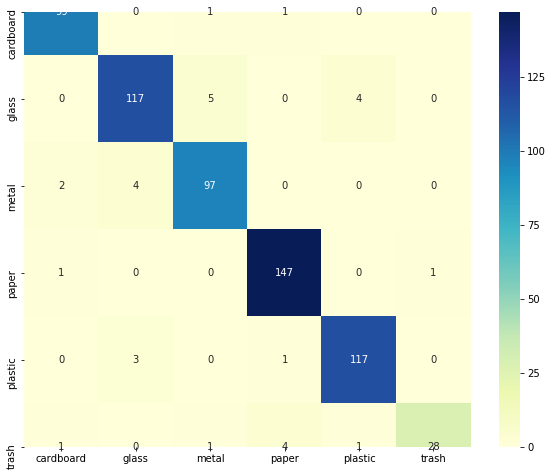

In [153]:

cm = confusion_matrix(y,yhat)
df_cm = pd.DataFrame(cm,waste_types,waste_types)

plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")



In [155]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]

In [156]:
accuracy = correct/sum(sum(cm))
accuracy

0.952755905511811

In [43]:
%matplotlib inline

In [107]:

## splits indices for a folder into train, validation, and test indices with random sampling
    ## input: folder path
    ## output: train, valid, and test indices    
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    ## train indices
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.5*n))

    ## temp
    remain = list(set(full_set)-set(train))

    ## separate remaining into validation and test
    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

## gets file names for a particular type of trash, given indices
    ## input: waste category and indices
    ## output: file names 
def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)    

## moves group of source files to another folder
    ## input: list of source files and destination folder
    ## no output
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.move(file,destination_folder)

In [108]:
## paths will be train/cardboard, train/glass, etc...
subsets = ['train','valid']
waste_types = ['cardboard','glass','metal','paper','plastic','trash']

## create destination folders for data subset and waste type
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
            
## move files to destination folders for each waste type
for waste_type in waste_types:
    source_folder = os.path.join('dataset-original',waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    ## move source files to train
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/"+waste_type
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "data/valid/"+waste_type
    move_files(valid_source_files,valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    ## I use data/test here because the images can be mixed up
    move_files(test_source_files,"data/test")